# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam

print ("Importing libraries is sucessful")

Importing libraries is sucessful


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
forest = pd.read_csv("forestfires.csv")
print ("Loading the dataset has been sucessful")
forest.head(10)

Loading the dataset has been sucessful


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [4]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


# Dataset Exploration

In [5]:
forest.shape

(517, 31)

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
cat_data = forest.select_dtypes('object').columns.to_list()
num_data = forest.columns.to_list()
for col in cat_data:
    num_data.remove(col)
num_data.remove('area')
print('the categoraical columns in the dataset is: ', cat_data)
print('the numerical columns in the dataset is: ', num_data)

the categoraical columns in the dataset is:  ['month', 'day', 'size_category']
the numerical columns in the dataset is:  ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


# Checking and Handling Null values and Duplicate Values

In [8]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
# see if the dataset containg duplicat values
forest.duplicated().sum()

8

In [10]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
# Dropping Duplicate Rows
forest.drop_duplicates(inplace = True)

# Statistical Analysis

In [12]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
forest.describe(include = ['object'])

,month,day,size_category
count,509,509,509
unique,12,7,2
top,aug,sun,small
freq,178,94,371


# Data Visualisations

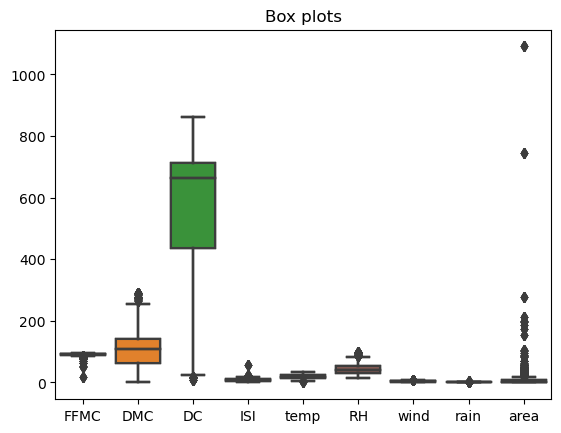

In [14]:
# Identification of Outliers in the dataset
num_col = forest[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
for i in num_col:
    sns.boxplot(data = num_col)
    plt.title("Box plots")

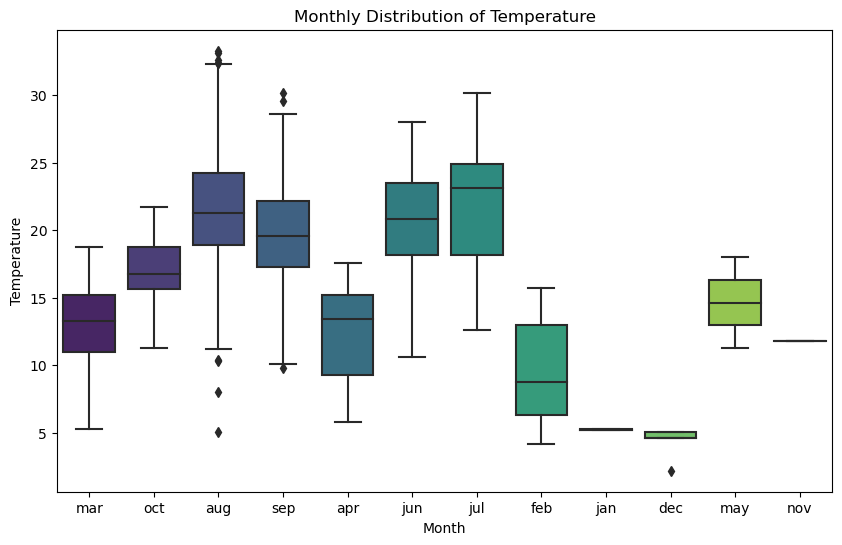

In [15]:
# Monthly Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='temp', data=forest, palette="viridis")
plt.title('Monthly Distribution of Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

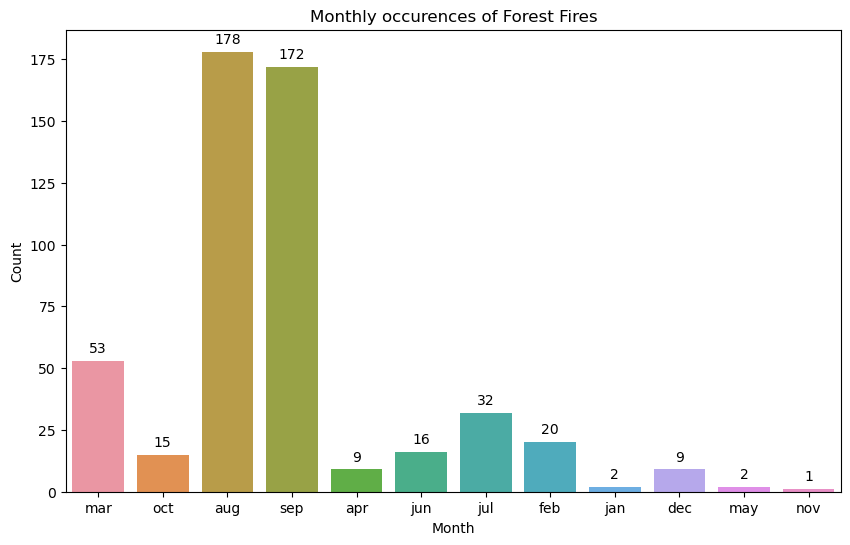

In [16]:
# Plotting the Count of Forest Fires by month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', data=forest)
plt.title('Monthly occurences of Forest Fires')
plt.xlabel('Month')
plt.ylabel('Count')

# Adding count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

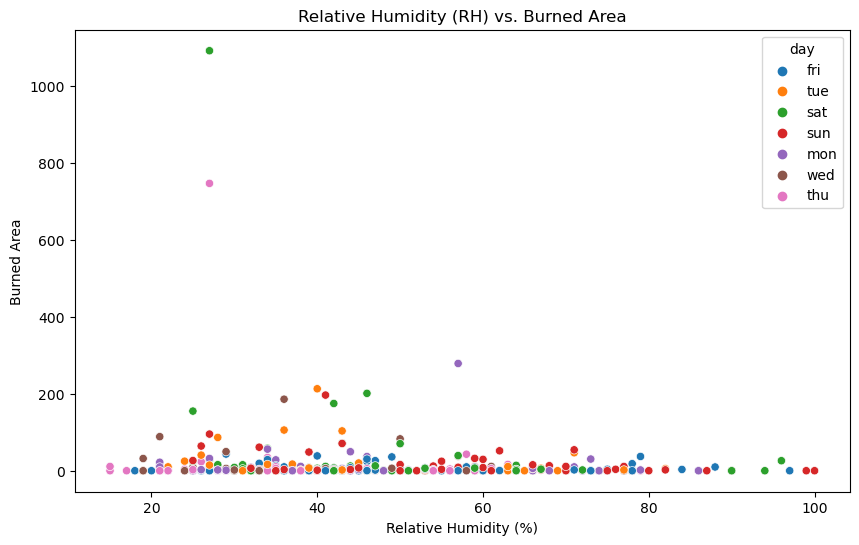

In [17]:
# Relative Humidity (RH) vs. Burned Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='area', data=forest, hue = 'day')
plt.title('Relative Humidity (RH) vs. Burned Area')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Burned Area')
plt.show()

<Figure size 800x600 with 0 Axes>

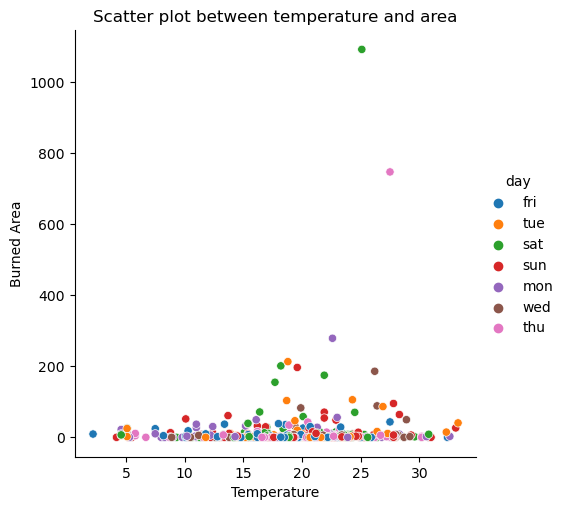

In [18]:
plt.figure(figsize = (8,6))
sns.relplot(data = forest, x = 'temp', y = 'area', hue = 'day')
plt.title("Scatter plot between temperature and area")
plt.ylabel('Burned Area')
plt.xlabel("Temperature")
plt.show()

<Figure size 800x600 with 0 Axes>

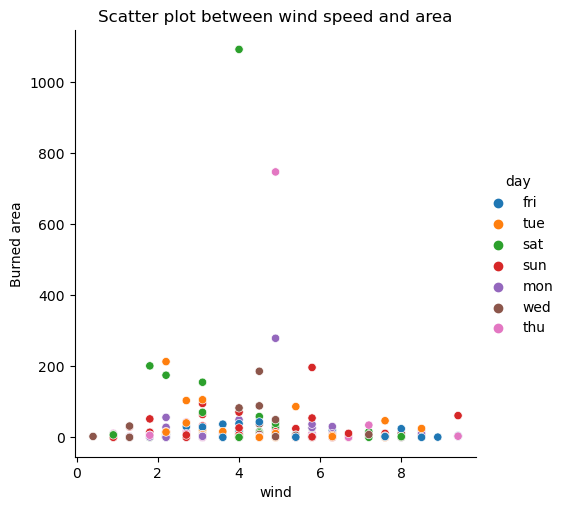

In [19]:
plt.figure(figsize = (8,6))
sns.relplot(data = forest, x = 'wind', y = 'area', hue = 'day')
plt.title("Scatter plot between wind speed and area")
plt.ylabel('Burned area')
plt.xlabel("wind")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

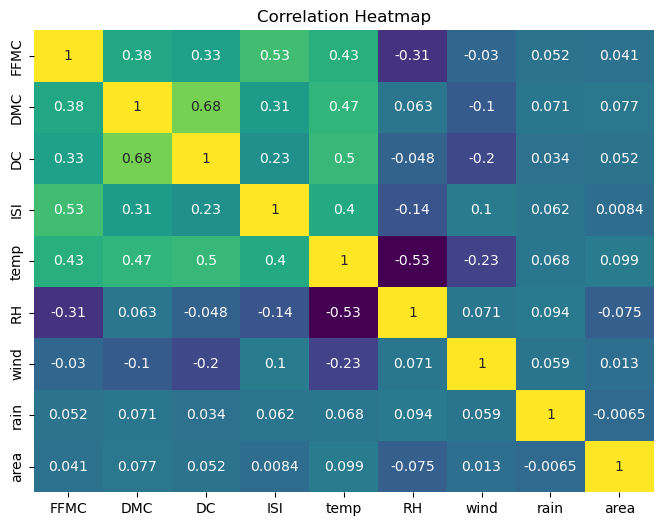

In [20]:
# Correlations heatmap
plt.figure(figsize = (8,6))
sns.heatmap(data = num_col.corr(), annot = True, cbar = False, cmap = 'viridis')
plt.title("Correlation Heatmap")

## Data Transformation and Features engineering

In [21]:
forest.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,...,0,0,0,0,0,0,0,0,1,large
359,sep,fri,92.5,122.0,789.7,10.2,21.1,39,2.2,0.0,...,0,0,0,0,0,0,0,0,1,large
374,sep,fri,90.3,290.0,855.3,7.4,10.3,78,4.0,0.0,...,0,0,0,0,0,0,0,0,1,large
505,aug,thu,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,...,0,0,0,0,0,0,0,0,0,small
263,aug,fri,91.1,141.1,629.1,7.1,19.3,39,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
290,jul,sat,91.6,104.2,474.9,9.0,18.7,53,1.8,0.0,...,0,0,1,0,0,0,0,0,0,small
394,feb,mon,84.1,4.6,46.7,2.2,5.3,68,1.8,0.0,...,1,0,0,0,0,0,0,0,0,small
427,aug,mon,92.1,207.0,672.6,8.2,27.9,33,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
306,sep,sun,89.6,84.1,714.3,5.7,17.1,53,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
350,sep,fri,92.1,99.0,745.3,9.6,10.1,75,3.6,0.0,...,0,0,0,0,0,0,0,0,1,small


In [22]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [23]:
forest.drop(columns = ['month', 'day'], inplace = True)

In [24]:
forest.sample(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
435,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00,0,...,0,0,1,0,0,0,0,0,0,small
269,92.1,152.6,658.2,14.3,19.1,53,2.7,0.0,4.40,0,...,0,0,0,0,0,0,0,0,0,small
395,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78,0,...,1,0,0,0,0,0,0,0,0,large
394,84.1,4.6,46.7,2.2,5.3,68,1.8,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,small
420,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76,0,...,0,0,0,0,0,0,0,0,0,large
298,91.2,147.8,377.2,12.7,19.6,43,4.9,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,small
184,93.9,135.7,586.7,15.1,20.8,34,4.9,0.0,6.96,1,...,0,0,0,0,0,0,0,0,0,large
159,92.4,117.9,668.0,12.2,19.0,34,5.8,0.0,1.69,1,...,0,0,0,0,0,0,0,0,1,small
309,92.4,105.8,758.1,9.9,24.9,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
236,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,0,...,0,0,0,0,0,0,0,0,1,large


In [25]:
X = forest.drop(['size_category'], axis = 1)

In [26]:
y = forest['size_category']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [28]:
X_train.shape

(407, 28)

In [29]:
X_test.shape

(102, 28)

### Data Normalisation

In [30]:
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)

In [32]:
X_test = sc.transform(X_test)

In [33]:
X_train

array([[-0.0937156 , -0.40535009,  0.78000036, ..., -0.04962917,
        -0.18164505,  1.45150619],
       [ 0.57446981, -0.11161973, -0.33852966, ..., -0.04962917,
        -0.18164505, -0.68893953],
       [ 0.51878769, -1.45256268, -2.07752269, ..., -0.04962917,
        -0.18164505, -0.68893953],
       ...,
       [-0.03803349, -0.29999029, -1.01716108, ..., -0.04962917,
        -0.18164505, -0.68893953],
       [-0.55773325, -0.89543281, -1.7725425 , ..., -0.04962917,
        -0.18164505, -0.68893953],
       [-0.18651913, -0.38619377,  0.69355564, ..., -0.04962917,
        -0.18164505,  1.45150619]])

In [34]:
X_test

array([[ 2.03255692e-01,  9.59071515e-02,  4.79463586e-01, ...,
        -4.96291667e-02, -1.81645049e-01, -6.88939534e-01],
       [ 7.78637576e-01,  1.25512385e-04,  4.22103072e-01, ...,
        -4.96291667e-02, -1.81645049e-01, -6.88939534e-01],
       [ 7.41516164e-01,  1.65714787e+00,  5.58637252e-01, ...,
        -4.96291667e-02, -1.81645049e-01, -6.88939534e-01],
       ...,
       [ 6.67273341e-01,  2.23616004e-01,  1.91045228e-01, ...,
        -4.96291667e-02, -1.81645049e-01, -6.88939534e-01],
       [ 2.03255692e-01, -1.19714498e+00, -1.87878063e+00, ...,
        -4.96291667e-02, -1.81645049e-01, -6.88939534e-01],
       [-5.57733253e-01, -8.95432813e-01, -1.77254250e+00, ...,
        -4.96291667e-02, -1.81645049e-01, -6.88939534e-01]])

### Label encoding for target variable

In [35]:
le = LabelEncoder()

In [36]:
y_train = le.fit_transform(y_train)

In [37]:
y_test = le.transform(y_test)

In [38]:
y_train

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [39]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

# Neural Network Model

In [40]:
model = Sequential()
model.add(Dense(20, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4rd layer or output layer

In [41]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 911 (3.56 KB)

 Trainable params: 911 (3.56 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4136 - loss: 0.7540 - val_accuracy: 0.3407 - val_loss: 0.7511
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4737 - loss: 0.7212 - val_accuracy: 0.4370 - val_loss: 0.7200
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5687 - loss: 0.6851 - val_accuracy: 0.4963 - val_loss: 0.6978
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5984 - loss: 0.6679 - val_accuracy: 0.6000 - val_loss: 0.6802
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6599 - loss: 0.6530 - val_accuracy: 0.6741 - val_loss: 0.6655
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6918 - loss: 0.6409 - val_accuracy: 0.7259 - val_loss: 0.6513
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6768 - loss: 0.6314 - val_accuracy: 0.7481 - val_loss: 0.6396
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7131 - loss: 0.6147 - val_accuracy: 0.7704 - val_loss:

In [44]:
y_pred =model.predict(X_test)
y_pred = (y_pred>=0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [45]:
accuracy = accuracy_score(y_test, y_pred)*100
print (f'Accuracy of the Model is: {accuracy:.2f}%')

Accuracy of the Model is: 91.18%


In [46]:
report  = classification_report(y_test, y_pred)
print ('************** Classification Report ****************')
print (report)

************** Classification Report ****************
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.93      0.95      0.94        73

    accuracy                           0.91       102
   macro avg       0.89      0.89      0.89       102
weighted avg       0.91      0.91      0.91       102



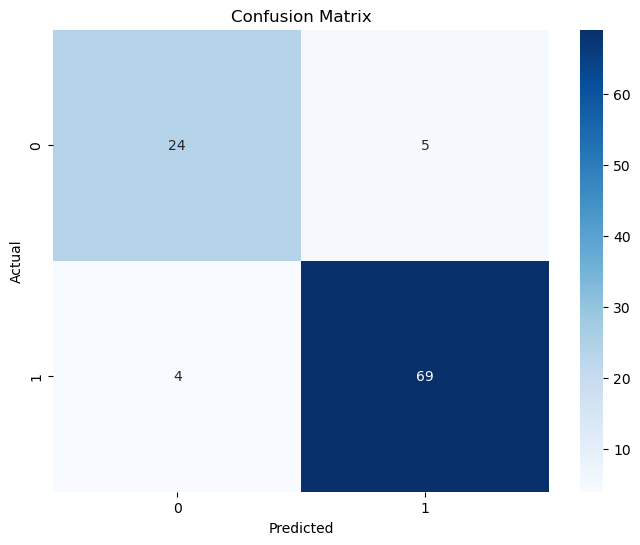

In [47]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(data = conf_mat, annot = True, cmap = 'Blues', fmt = 'd')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Deep Neural Networks (DNN)

In [48]:
# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=28, activation='relu'))  # 1st hidden layer with 64 neurons
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 neurons
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(16, activation='relu'))  # 3rd hidden layer with 16 neurons
model.add(Dropout(0.3))

# Output layer (since this is a binary classification problem, we use 1 output neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.001),  # You can adjust the learning rate if needed
              metrics=['accuracy'])

In [49]:
# Print the summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.33, 
                    epochs=100,
                    verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5740 - loss: 0.6807 - val_accuracy: 0.7556 - val_loss: 0.6067
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6404 - loss: 0.6246 - val_accuracy: 0.7630 - val_loss: 0.5826
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6937 - loss: 0.6273 - val_accuracy: 0.7704 - val_loss: 0.5725
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6880 - loss: 0.6328 - val_accuracy: 0.7704 - val_loss: 0.5665
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6597 - loss: 0.7436 - val_accuracy: 0.7704 - val_loss: 0.5633
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7344 - loss: 0.5842 - val_accuracy: 0.7704 - val_loss: 0.5612
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7251 - loss: 0.6141 - val_accuracy: 0.7778 - val_loss: 0.5610
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7019 - loss: 0.6043 - val_accuracy: 0.7778 - val_loss: 0.561

In [51]:
y_pred_dnn =model.predict(X_test)
y_pred_dnn = (y_pred_dnn>=0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


In [52]:
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)*100
print (f'Accuracy of the DNN Model is: {accuracy_dnn:.2f}%')

Accuracy of the DNN Model is: 96.08%


In [53]:
report_dnn  = classification_report(y_test, y_pred_dnn)
print ('************ Classification Report (DNN) ***************')
print (report_dnn)

************ Classification Report (DNN) ***************
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.95      1.00      0.97        73

    accuracy                           0.96       102
   macro avg       0.97      0.93      0.95       102
weighted avg       0.96      0.96      0.96       102



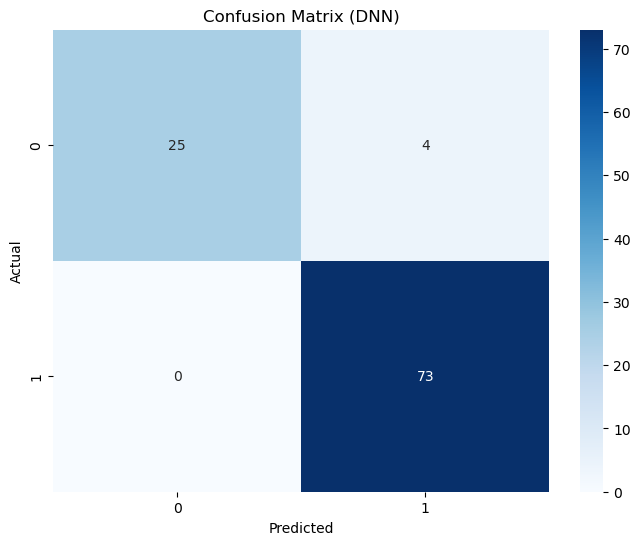

In [54]:
conf_mat_dnn = confusion_matrix(y_test, y_pred_dnn)
plt.figure(figsize = (8,6))
sns.heatmap(data = conf_mat_dnn, annot = True, cmap = 'Blues', fmt = 'd')
plt.title("Confusion Matrix (DNN)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()